Prueba transformaciones con OpenCv

In [124]:
!pip install opencv-python


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [125]:
# instalando google patch

In [126]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
print(cv2.__version__)

4.10.0


Importando la imágen

In [127]:
img = cv2.imread('image.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [128]:
img[0:15]

array([[39, 29, 29, ..., 29, 29, 40],
       [21, 15, 17, ..., 17, 17, 21],
       [29, 18, 17, ..., 17, 17, 29],
       ...,
       [29, 17, 17, ..., 17, 17, 29],
       [29, 17, 17, ..., 17, 17, 29],
       [29, 17, 17, ..., 17, 17, 29]], dtype=uint8)

In [129]:
# r - min / max - min
def retorno_rango(img, k = 255):
  max = img.max()
  min = img.min()
  _img = k * (img - min) / (max - min)
  return (k * (img - min)) / (max - min)

In [137]:
def cv2_imshow(img):
  # poner la imágen en rango 0 a 1
  print(img.max(), img.min())
  plt.imshow(img, cmap='gray')
  plt.show()

In [131]:
def log_transform(c, r):
  transformada = c * np.log(r + 1)
  # retornar al rango
  return transformada

def negativo(r):
  transformada = 255 - r
  return transformada

def gamma_transform(r, c,  gamma):
  transformada = c * (r ** gamma)
  return transformada

def bit_plane_slicing(r, bit):
  transformada = r & (1 << bit)
  return transformada

## Imagen bajo brillo

Transformaciones a imagen con bajo brillo

In [132]:
img.max(), img.min()

(np.uint8(255), np.uint8(0))

### Transformacion logaritmica con c=15

C:\Users\emman\AppData\Local\Temp\ipykernel_21584\1248610797.py:2: RuntimeWarning: divide by zero encountered in log
  transformada = c * np.log(r + 1)


83.1 -inf


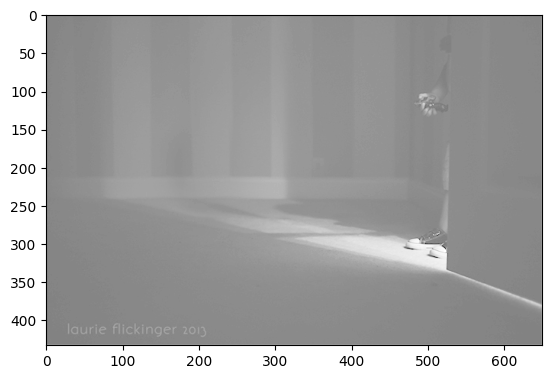

In [138]:
# aplicar la transformación log
log_img = log_transform(15, img)
type(log_img)
cv2_imshow(log_img)# print(log_img[0:15])

### Negativo

In [134]:
# aplicar negativo
neg_img = negativo(img)
neg_img = neg_img.astype(np.uint8)
#cv2_imshow(neg_img)

### Transformacion gamma
> gamma = 5

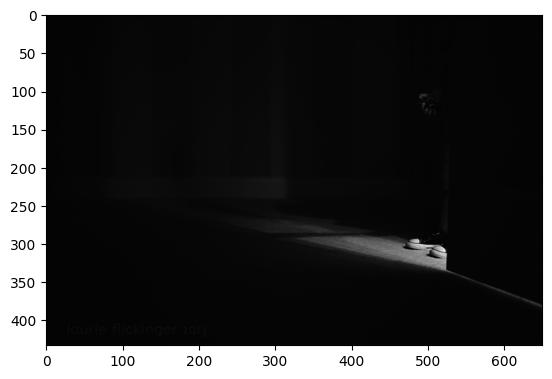

In [135]:
gamma_img = gamma_transform(img, 2 , 1.5)
cv2_imshow(gamma_img)

### Rebanada de bit

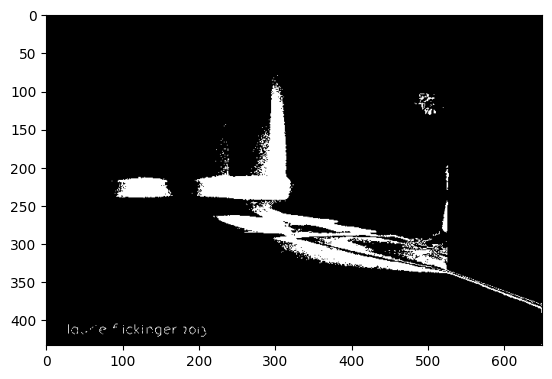

In [136]:
img_bit = bit_plane_slicing(img, 5)
cv2_imshow(img_bit)